In [10]:
import pandas as pd
import nltk
from textblob import TextBlob
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np
import re

In [6]:
data=pd.read_csv("/content/Elon_musk.csv", encoding='cp1252')
data.head()

,Unnamed: 0,Text
0,1,@kunalb11 I’m an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [7]:
data.columns

Index(['Unnamed: 0', 'Text'], dtype='object')

In [9]:
data_final=data.drop(columns=['Unnamed: 0'])
data_final

,Text
0,@kunalb11 I’m an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [11]:
# removing unnecessary symbols from text
def cleaning(text):
    text=re.sub('@[A-Za-z0-9]+','',text) 
    text=re.sub('#','',text) 
    text=re.sub('RT[\s]+','',text) 
    text=re.sub('https?:\/\/\S+',"",text)    
    return text

In [17]:
data_final['Text'] = data_final['Text'].apply(cleaning)

In [18]:
data_final.head()

,Text
0,I’m an alien
1,_AA_Carmack Ray tracing on Cyberpunk with HDR ...
2,Great interview!
3,Doge is underestimated
4,Congratulations Tesla China for amazing execu...


In [14]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [15]:
stop = stopwords.words('english')
stop.append(['&amp'])


In [16]:
lemma = WordNetLemmatizer()

In [19]:
data_final['Text']=data_final['Text'].apply(lambda x : ' '.join([ lemma.lemmatize(word) for word in x.split() if word not in (stop)]))

In [20]:
data_final

,Text
0,I’m alien
1,_AA_Carmack Ray tracing Cyberpunk HDR next-lev...
2,Great interview!
3,Doge underestimated
4,Congratulations Tesla China amazing execution ...
...,...
1994,"True, sound surreal, negative propaganda still..."
1995,Make sure read ur term &amp; condition clickin...
1996,Samwise Gamgee
1997,Altho Dumb Dumber <U+0001F525><U+0001F525>


In [21]:
def Subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def Polarity(text):
    return TextBlob(text).sentiment.polarity

In [22]:
data_final['Subjectivity'] = data_final['Text'].apply(Subjectivity)
data_final['Polarity']=data_final['Text'].apply(Polarity)

In [23]:
data_final.head()

,Text,Subjectivity,Polarity
0,I’m alien,0.750000,-0.250000
1,_AA_Carmack Ray tracing Cyberpunk HDR next-lev...,0.000000,0.000000
2,Great interview!,0.750000,1.000000
3,Doge underestimated,0.000000,0.000000
4,Congratulations Tesla China amazing execution ...,0.366667,0.345313


In [24]:
def emotion(score):
    if score < 0:
        return 'Negative'
    elif score ==0:
        return 'Neutral'
    else:
        return 'Positive'
    
data_final['emotion'] = data_final['Polarity'].apply(emotion)

In [25]:
data_final.head()

,Text,Subjectivity,Polarity,emotion
0,I’m alien,0.750000,-0.250000,Negative
1,_AA_Carmack Ray tracing Cyberpunk HDR next-lev...,0.000000,0.000000,Neutral
2,Great interview!,0.750000,1.000000,Positive
3,Doge underestimated,0.000000,0.000000,Neutral
4,Congratulations Tesla China amazing execution ...,0.366667,0.345313,Positive


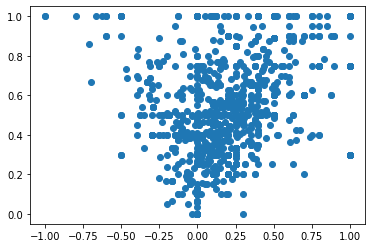

In [27]:
plt.scatter(data_final["Polarity"],data_final["Subjectivity"])

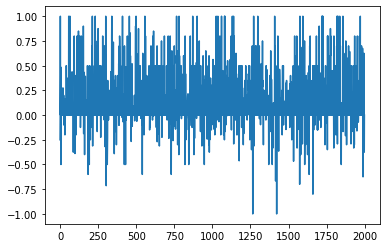

In [32]:
data_final["Polarity"].plot()

In [33]:
stoptext = pd.read_csv('stop.txt', sep=" ", header=None)

In [35]:
data_final['Text_extra']=data_final['Text'].apply(lambda x : ' '.join([ lemma.lemmatize(word) for word in x.split() if word not in (stoptext)]))

<function matplotlib.pyplot.show>

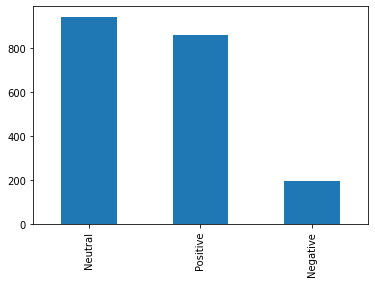

In [41]:
data_final['emotion'].value_counts().plot(kind='bar')
plt.show

In [40]:
#Word cloud


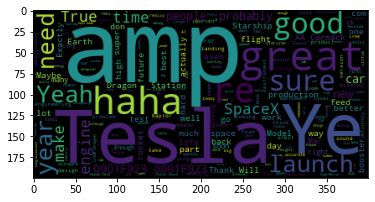

In [39]:
words = ' '.join([ txts for txts in data_final['Text_extra']])
wordcloud = WordCloud().generate(words)

plt.imshow(wordcloud)

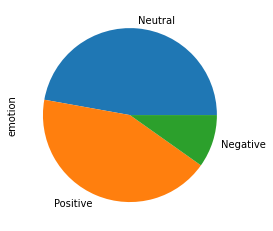

In [46]:
data_final['emotion'].value_counts().plot.pie()